<a href="https://colab.research.google.com/github/UniCandice/Ontology/blob/main/ontology_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install rdflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.1/562.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.2/116.2 kB 9.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from rdflib import Graph, URIRef, Literal, Namespace
from rdflib.namespace import XSD

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('timeseries.csv')

In [ ]:
print(df)

             Timestamp  Density  Temperature  Current   SOC
0  2024-10-01T12:00:00     1.20         30.0      5.0  0.80
1  2024-10-01T12:01:00     1.30         31.0      6.0  0.79
2  2024-10-01T12:02:00     1.25         30.5      5.5  0.82
3  2024-10-01T12:03:00     1.40         32.0      7.0  0.78
4  2024-10-01T12:04:00     1.35         31.5      6.5  0.80
5  2024-10-01T12:05:00     1.30         30.0      5.0  0.77
6  2024-10-01T12:06:00     1.40         29.0      6.0  0.76
7  2024-10-01T12:07:00     1.45         30.0      7.5  0.75
8  2024-10-01T12:08:00     1.50         31.0      8.0  0.74
9  2024-10-01T12:09:00     1.55         32.0      9.0  0.73


In [ ]:
# Create a new RDF graph
g = Graph()

# Define a namespace for your ontology
TS = Namespace("http://example.org/timeseries#")

In [ ]:
# Create a TimeSeries instance
time_series_instance = TS.TimeSeries1
g.add((time_series_instance, URIRef("http://example.org/timeseries#isA"), URIRef("http://example.org/timeseries#TimeSeries")))


<Graph identifier=N7f6292b996684900bb5d1bd44e509dac (<class 'rdflib.graph.Graph'>)>

In [ ]:
# Populate the RDF graph with data
for index, row in df.iterrows():
    measurement = TS[f"Measurement{index + 1}"]  # Unique URI for each measurement

    g.add((measurement, URIRef("http://example.org/timeseries#isA"), URIRef("http://example.org/timeseries#Measurement")))
    g.add((measurement, URIRef("http://example.org/timeseries#densityValue"), Literal(row['Density'], datatype=XSD.float)))
    g.add((measurement, URIRef("http://example.org/timeseries#temperatureValue"), Literal(row['Temperature'], datatype=XSD.float)))
    g.add((measurement, URIRef("http://example.org/timeseries#currentValue"), Literal(row['Current'], datatype=XSD.float)))
    g.add((measurement, URIRef("http://example.org/timeseries#SOCValue"), Literal(row['SOC'], datatype=XSD.float)))
    g.add((measurement, URIRef("http://example.org/timeseries#timestamp"), Literal(row['Timestamp'], datatype=XSD.dateTime)))
    g.add((measurement, URIRef("http://example.org/timeseries#hasMeasurement"), time_series_instance))

In [ ]:
# Save the graph to a Turtle file
g.serialize(destination='timeseries.ttl', format='turtle')

<Graph identifier=N7f6292b996684900bb5d1bd44e509dac (<class 'rdflib.graph.Graph'>)>

In [ ]:
# Print the RDF graph in Turtle format
print(g.serialize(format='turtle'))


@prefix ns1: <http://example.org/timeseries#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ns1:Measurement1 ns1:SOCValue "0.8"^^xsd:float ;
    ns1:currentValue "5.0"^^xsd:float ;
    ns1:densityValue "1.2"^^xsd:float ;
    ns1:hasMeasurement ns1:TimeSeries1 ;
    ns1:isA ns1:Measurement ;
    ns1:temperatureValue "30.0"^^xsd:float ;
    ns1:timestamp "2024-10-01T12:00:00"^^xsd:dateTime .

ns1:Measurement10 ns1:SOCValue "0.73"^^xsd:float ;
    ns1:currentValue "9.0"^^xsd:float ;
    ns1:densityValue "1.55"^^xsd:float ;
    ns1:hasMeasurement ns1:TimeSeries1 ;
    ns1:isA ns1:Measurement ;
    ns1:temperatureValue "32.0"^^xsd:float ;
    ns1:timestamp "2024-10-01T12:09:00"^^xsd:dateTime .

ns1:Measurement2 ns1:SOCValue "0.79"^^xsd:float ;
    ns1:currentValue "6.0"^^xsd:float ;
    ns1:densityValue "1.3"^^xsd:float ;
    ns1:hasMeasurement ns1:TimeSeries1 ;
    ns1:isA ns1:Measurement ;
    ns1:temperatureValue "31.0"^^xsd:float ;
    ns1:timestamp "2024-10-01T12:01:00"^^xsd:da

In [ ]:
import pandas as pd
from rdflib import Graph, URIRef, Literal, Namespace
from rdflib.namespace import XSD, RDF, RDFS, OWL

# Load the CSV file into a DataFrame
df = pd.read_csv('timeseries.csv')

# Create a new RDF graph
g = Graph()

# Define a namespace for your ontology
TS = Namespace("http://example.org/timeseries#")
g.bind("ts", TS)

# Define classes in the ontology (TimeSeries, Measurement)
g.add((TS.TimeSeries, RDF.type, OWL.Class))
g.add((TS.Measurement, RDF.type, OWL.Class))

# Define object properties for relationships
g.add((TS.hasMeasurement, RDF.type, OWL.ObjectProperty))
g.add((TS.hasMeasurement, RDFS.domain, TS.TimeSeries))
g.add((TS.hasMeasurement, RDFS.range, TS.Measurement))

# Define data properties for measurement values
g.add((TS.densityValue, RDF.type, OWL.DatatypeProperty))
g.add((TS.densityValue, RDFS.domain, TS.Measurement))
g.add((TS.densityValue, RDFS.range, XSD.float))

g.add((TS.temperatureValue, RDF.type, OWL.DatatypeProperty))
g.add((TS.temperatureValue, RDFS.domain, TS.Measurement))
g.add((TS.temperatureValue, RDFS.range, XSD.float))

g.add((TS.currentValue, RDF.type, OWL.DatatypeProperty))
g.add((TS.currentValue, RDFS.domain, TS.Measurement))
g.add((TS.currentValue, RDFS.range, XSD.float))

g.add((TS.SOCValue, RDF.type, OWL.DatatypeProperty))
g.add((TS.SOCValue, RDFS.domain, TS.Measurement))
g.add((TS.SOCValue, RDFS.range, XSD.float))

g.add((TS.timestamp, RDF.type, OWL.DatatypeProperty))
g.add((TS.timestamp, RDFS.domain, TS.Measurement))
g.add((TS.timestamp, RDFS.range, XSD.dateTime))

# Create a TimeSeries instance
time_series_instance = TS.TimeSeries1
g.add((time_series_instance, RDF.type, TS.TimeSeries))

# Populate the RDF graph with data
for index, row in df.iterrows():
    measurement = TS[f"Measurement{index + 1}"]  # Unique URI for each measurement

    g.add((measurement, RDF.type, TS.Measurement))
    g.add((measurement, TS.densityValue, Literal(row['Density'], datatype=XSD.float)))
    g.add((measurement, TS.temperatureValue, Literal(row['Temperature'], datatype=XSD.float)))
    g.add((measurement, TS.currentValue, Literal(row['Current'], datatype=XSD.float)))
    g.add((measurement, TS.SOCValue, Literal(row['SOC'], datatype=XSD.float)))
    g.add((measurement, TS.timestamp, Literal(row['Timestamp'], datatype=XSD.dateTime)))

    # Link measurement to the time series
    g.add((time_series_instance, TS.hasMeasurement, measurement))

# Save the graph to an OWL file (Turtle format is still a valid OWL format)
g.serialize(destination='timeseries.owl', format='turtle')

# Print the OWL graph in Turtle format
print(g.serialize(format='turtle'))


@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ts: <http://example.org/timeseries#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ts:SOCValue a owl:DatatypeProperty ;
    rdfs:domain ts:Measurement ;
    rdfs:range xsd:float .

ts:TimeSeries1 a ts:TimeSeries ;
    ts:hasMeasurement ts:Measurement1,
        ts:Measurement10,
        ts:Measurement2,
        ts:Measurement3,
        ts:Measurement4,
        ts:Measurement5,
        ts:Measurement6,
        ts:Measurement7,
        ts:Measurement8,
        ts:Measurement9 .

ts:currentValue a owl:DatatypeProperty ;
    rdfs:domain ts:Measurement ;
    rdfs:range xsd:float .

ts:densityValue a owl:DatatypeProperty ;
    rdfs:domain ts:Measurement ;
    rdfs:range xsd:float .

ts:hasMeasurement a owl:ObjectProperty ;
    rdfs:domain ts:TimeSeries ;
    rdfs:range ts:Measurement .

ts:temperatureValue a owl:DatatypeProperty ;
    rdfs:domain ts:Measurement ;
    rdfs:ra

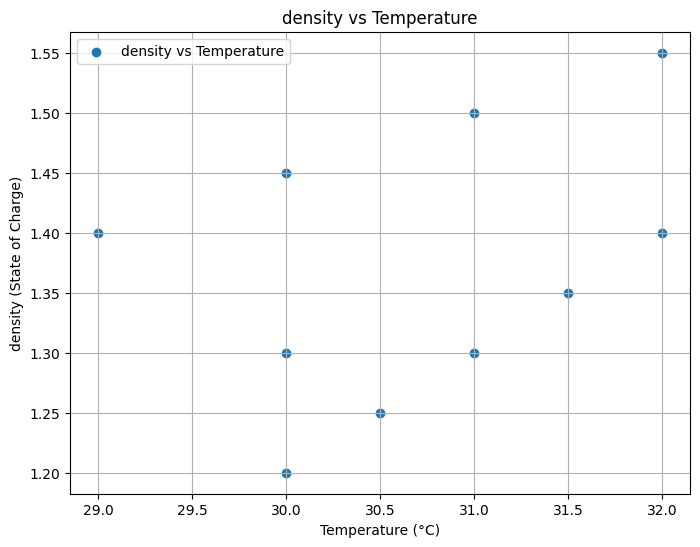

In [ ]:
import matplotlib.pyplot as plt
from rdflib import Graph
import numpy as np

# Load the OWL file into a graph
g = Graph()
g.parse("timeseries.owl", format="turtle")

# SPARQL query to get SOC and Temperature values
query = """
    PREFIX ts: <http://example.org/timeseries#>
    SELECT ?density ?temperature
    WHERE {
        ?measurement a ts:Measurement ;
                     ts:densityValue ?density ;
                     ts:temperatureValue ?temperature .
    }
"""

# Execute the SPARQL query
results = g.query(query)

# Extract SOC and Temperature values
density_values = []
temperature_values = []

for row in results:
    density_values.append(float(row.density))          # density
    temperature_values.append(float(row.temperature))  # Temperature

# Convert to numpy arrays for plotting (optional but convenient)
density_values = np.array(density_values)
temperature_values = np.array(temperature_values)

# Plot SOC vs Temperature
plt.figure(figsize=(8, 6))
plt.scatter(temperature_values, density_values, label='density vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('density (State of Charge)')
plt.title('density vs Temperature')
plt.grid(True)
plt.legend()
plt.show()
